# Bayesian Methods VS Frequentists Methods
***

- https://www.analyticsvidhya.com/blog/2018/05/24-ultimate-data-science-projects-to-boost-your-knowledge-and-skills/

## Classification
***

### Loan Prediction
***

- https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/

#### Data Collection
***

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('train_ctrUa4K.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


***
**Fix up Data**

In [3]:
# Loan ID
df = df.set_index('Loan_ID')

In [4]:
# Loan Status
# df['Loan_Status'].value_counts()
df['target'] = np.where(df['Loan_Status']=='Y',1,0)
df.drop(columns=['Loan_Status'],inplace=True)
df['target'].value_counts(dropna=False)

1    422
0    192
Name: target, dtype: int64

In [5]:
# Gender
# df['Gender'].value_counts()
df['male'] = np.where(df['Gender']=='Male',1,0)
df.drop(columns=['Gender'],inplace=True)
df['male'].value_counts(dropna=False)

1    489
0    125
Name: male, dtype: int64

In [6]:
# Married
# df['Married'].value_counts()
df['married'] = np.where(df['Married']=='Yes',1,0)
df.drop(columns=['Married'],inplace=True)
df['married'].value_counts(dropna=False)

1    398
0    216
Name: married, dtype: int64

In [7]:
# Dependents
# df['Dependents'].value_counts(dropna=False)
df['zero_dep'] = np.where(df['Dependents']=='0',1,0)
# df['one_dep'] = np.where(df['Dependents']=='1',1,0)
# df['two_dep'] = np.where(df['Dependents']=='2',1,0)
# df['three_dep'] = np.where(df['Dependents']=='3+',1,0)
df.drop(columns=['Dependents'],inplace=True)
df['zero_dep'].value_counts()

1    345
0    269
Name: zero_dep, dtype: int64

In [8]:
# Education
# df['Education'].value_counts(dropna=False)
df['graduate'] = np.where(df['Education']=='Graduate',1,0)
df.drop(columns=['Education'],inplace=True)
df['graduate'].value_counts()

1    480
0    134
Name: graduate, dtype: int64

In [9]:
# Self_Employed
# df['Self_Employed'].value_counts(dropna=False)
df['self_employed'] = np.where(df['Self_Employed']=='Yes',1,0)
df.drop(columns=['Self_Employed'],inplace=True)
df['self_employed'].value_counts()

0    532
1     82
Name: self_employed, dtype: int64

In [10]:
# Property Area
# df['Property_Area'].value_counts(dropna=False)
# df['suburbs'] = np.where(df['Property_Area']=='Semiurban',1,0)
df['rural'] = np.where(df['Property_Area']=='Rural',1,0)
df['urban'] = np.where(df['Property_Area']=='Urban',1,0)
df.drop(columns=['Property_Area'],inplace=True)
df['urban'].value_counts()

0    412
1    202
Name: urban, dtype: int64

In [11]:
# Credit History
df['Credit_History'].value_counts(dropna=False)
df['Credit_History'].fillna(0.0,inplace=True)
df['Credit_History'] = df['Credit_History'].astype(int)
df['Credit_History'].value_counts(dropna=False)

1    475
0    139
Name: Credit_History, dtype: int64

In [12]:
# Applicant Income
print(df['ApplicantIncome'].describe())
df['ApplicantIncome'] = df['ApplicantIncome'].astype(int)
df['ApplicantIncome'].isnull().any()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64


False

In [13]:
# Coapplicant Income
print(df['CoapplicantIncome'].describe())
df['CoapplicantIncome'] = df['CoapplicantIncome'].astype(int)
df['CoapplicantIncome'].isnull().any()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64


False

In [14]:
# Loan Amount
print(df['LoanAmount'].describe())
df['LoanAmount'].isnull().any()
lat_med = df['LoanAmount'].median()
df['LoanAmount'].fillna(lat_med,inplace=True)
df['LoanAmount'] = df['LoanAmount'].astype(int)
df['LoanAmount'].isnull().any()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64


False

In [15]:
# Loan Amount Term
print(df['Loan_Amount_Term'].describe())
df['Loan_Amount_Term'].isnull().any()
lat_med = df['Loan_Amount_Term'].median()
df['Loan_Amount_Term'].fillna(lat_med,inplace=True)
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype(int)
df['Loan_Amount_Term'].isnull().any()

count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: Loan_Amount_Term, dtype: float64


False

In [16]:
df.isnull().any()

ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
target               False
male                 False
married              False
zero_dep             False
graduate             False
self_employed        False
rural                False
urban                False
dtype: bool

In [17]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,target,male,married,zero_dep,graduate,self_employed,rural,urban
Loan_ID,,,,,,,,,,,,,
LP001002,5849,0,128,360,1,1,1,0,1,1,0,0,1
LP001003,4583,1508,128,360,1,0,1,1,0,1,0,1,0
LP001005,3000,0,66,360,1,1,1,1,1,1,1,0,1
LP001006,2583,2358,120,360,1,1,1,1,1,0,0,0,1
LP001008,6000,0,141,360,1,1,1,0,1,1,0,0,1


#### Frequentist
***

In [18]:
import statsmodels.api as sm

In [19]:
y = df['target']
x = sm.add_constant(df.drop(columns=['target']))

In [20]:
freq_log = sm.Logit(y,x)

In [21]:
freq_results = freq_log.fit()

Optimization terminated successfully.
         Current function value: 0.514089
         Iterations 6


In [22]:
freq_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  614
Model:                          Logit   Df Residuals:                      601
Method:                           MLE   Df Model:                           12
Date:                Mon, 07 Feb 2022   Pseudo R-squ.:                  0.1725
Time:                        18:13:19   Log-Likelihood:                -315.65
converged:                       True   LL-Null:                       -381.45
Covariance Type:            nonrobust   LLR p-value:                 2.959e-22
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.5682      0.698     -0.814      0.416      -1.936       0.800
ApplicantIncome   -3.338e-06   2.11e-05     -0.158      0.874   -4.47e-05     3.8e-05
CoapplicantIncome -3.954e-05   3.74e-05     -1.058      0.290      -0.000    3.37e-05
LoanAmount           -0.0008      0.002     -0.541      0.589      -0.004       0.002
Loan_Amount_Term     -0.0011      0.002     -0.664      0.507      -0.004       0.002
Credit_History        2.1594      0.223      9.693      0.000       1.723       2.596
male                 -0.0046      0.262     -0.018      0.986      -0.518       0.508
married               0.6392      0.233      2.740      0.006       0.182       1.096
zero_dep              0.1892      0.218      0.870      0.385      -0.237       0.616
graduate              0.3585      0.238      1.508      0.131      -0.107       0.824
self_employed         0.0187      0.294      0.064      0.949      -0.558       0.595
rural                -0.7858      0.247     -3.183      0.001      -1.270      -0.302
urban                -0.5385      0.245     -2.202      0.028      -1.018      -0.059
=====================================================================================
"""

#### Bayesian
***

In [23]:
import arviz as az
import bambi as bmb
import scipy.stats as stats
import matplotlib.pyplot as plt

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [24]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,target,male,married,zero_dep,graduate,self_employed,rural,urban
Loan_ID,,,,,,,,,,,,,
LP001002,5849,0,128,360,1,1,1,0,1,1,0,0,1
LP001003,4583,1508,128,360,1,0,1,1,0,1,0,1,0
LP001005,3000,0,66,360,1,1,1,1,1,1,1,0,1
LP001006,2583,2358,120,360,1,1,1,1,1,0,0,0,1
LP001008,6000,0,141,360,1,1,1,0,1,1,0,0,1


In [25]:
bern_mdl = bmb.Model("""target ~ ApplicantIncome + CoapplicantIncome + LoanAmount + Loan_Amount_Term + Credit_History
                        + male + married + zero_dep + graduate + self_employed + urban + rural
                     """
                     ,data=df
                     ,family='bernoulli'                    
                    )
# Built the model as text
# Set Data to DF
# Bernoulli because binary outcome

In [26]:
bern_fit = bern_mdl.fit(draws=100, chains=4, init='adapt_diag')
# Fit the model using 1000 draws in 4 chains

Modeling the probability that target==1
Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [rural, urban, self_employed, graduate, zero_dep, married, male, Credit_History, Loan_Amount_Term, LoanAmount, CoapplicantIncome, ApplicantIncome, Intercept]


Sampling 4 chains for 1_000 tune and 100 draw iterations (4_000 + 400 draws total) took 68 seconds.


In [27]:
bern_mdl.predict(bern_fit, kind="pps", draws=1000)

array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>,
        <AxesSubplot:title={'center':'LoanAmount'}>],
       [<AxesSubplot:title={'center':'Loan_Amount_Term'}>,
        <AxesSubplot:title={'center':'Credit_History'}>,
        <AxesSubplot:title={'center':'male'}>,
        <AxesSubplot:title={'center':'married'}>],
       [<AxesSubplot:title={'center':'zero_dep'}>,
        <AxesSubplot:title={'center':'graduate'}>,
        <AxesSubplot:title={'center':'self_employed'}>,
        <AxesSubplot:title={'center':'urban'}>],
       [<AxesSubplot:title={'center':'rural'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

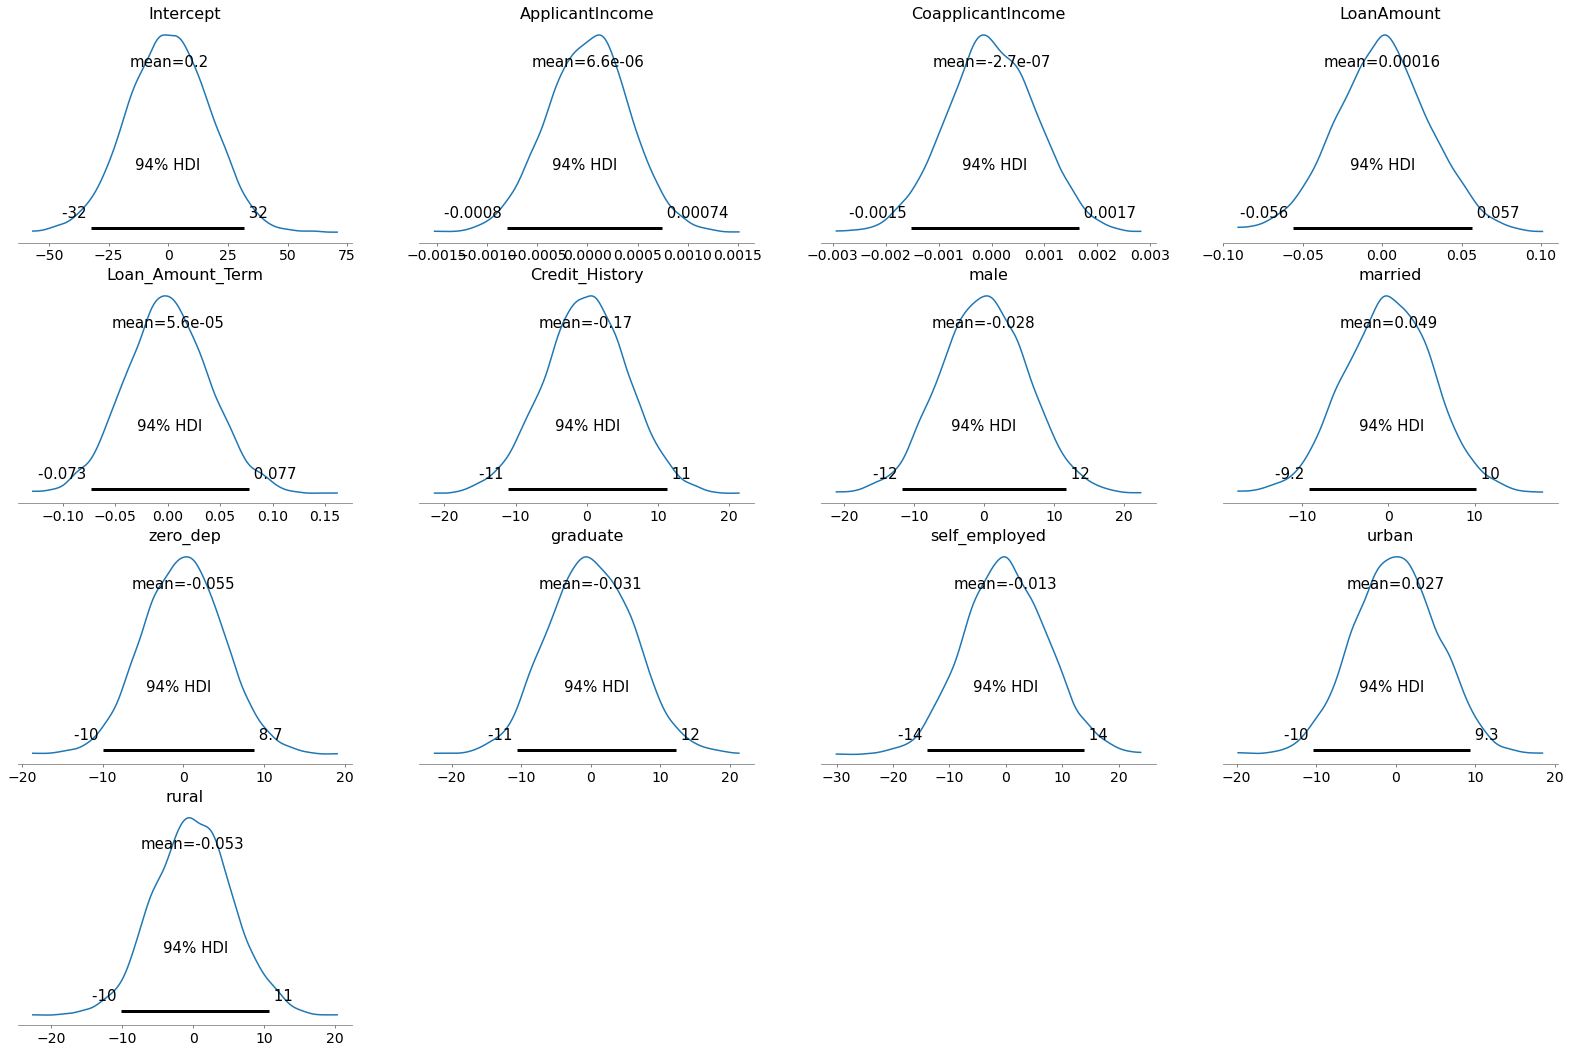

In [28]:
bern_mdl.plot_priors()

array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'Intercept'}>],
       [<AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'LoanAmount'}>],
       [<AxesSubplot:title={'center':'male'}>,
        <AxesSubplot:title={'center':'male'}>],
       [<AxesSubplot:title={'center':'Credit_History'}>,
        <AxesSubplot:title={'center':'Credit_History'}>]], dtype=object)

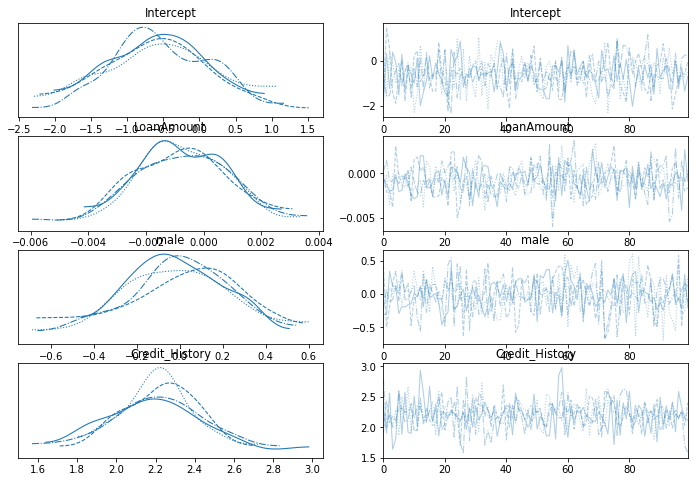

In [29]:
az.plot_trace(bern_fit, var_names=["Intercept", "LoanAmount", "male","Credit_History"])

In [30]:
bern_fit.posterior.Credit_History.values.mean()

2.2120968531898266

In [31]:
bern_fit.posterior.male.values.mean()

-0.006999872470951812

In [32]:
bern_fit.posterior.LoanAmount.values.mean()

-0.0007455682173074881

<AxesSubplot:xlabel='target / target'>

C:\Users\wallj\anaconda3\envs\pymc_env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


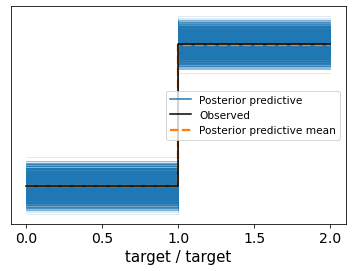

In [33]:
az.plot_ppc(bern_fit)

***
**PYMC3**

In [38]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import scipy.stats as stats
import pymc3 as pm

In [42]:
# The parameters are the bounds of the Uniform.
with pm.Model() as model:
    p = pm.Uniform('p', lower=0, upper=1)

In [39]:
#set constants
p_true = 0.05  # remember, this is unknown.
N = 1500

# sample N Bernoulli random variables from Ber(0.05).
# each random variable has a 0.05 chance of being a 1.
# this is the data-generation step
occurrences = stats.bernoulli.rvs(p_true, size=N)

print(occurrences) # Remember: Python treats True == 1, and False == 0
print(np.sum(occurrences))

[0 0 0 ... 0 0 0]
76


In [40]:
# Occurrences.mean is equal to n/N.
print("What is the observed frequency in Group A? %.4f" % np.mean(occurrences))
print("Does this equal the true frequency? %s" % (np.mean(occurrences) == p_true))

What is the observed frequency in Group A? 0.0507
Does this equal the true frequency? False


In [41]:
#include the observations, which are Bernoulli
with model:
    obs = pm.Bernoulli("obs", p, observed=occurrences)
    # To be explained in chapter 3
    step = pm.Metropolis()
    trace = pm.sample(18000, step=step)
    burned_trace = trace[1000:]

NameError: name 'burned_trace' is not defined

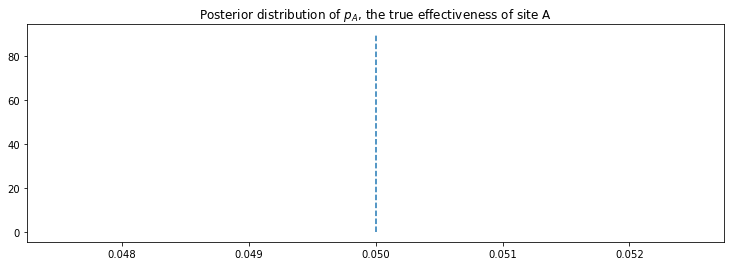

In [43]:
figsize(12.5, 4)
plt.title("Posterior distribution of $p_A$, the true effectiveness of site A")
plt.vlines(p_true, 0, 90, linestyle="--", label="true $p_A$ (unknown)")
plt.hist(burned_trace["p"], bins=25, histtype="stepfilled", density=True)
plt.legend();

In [ ]:
#group A
with pm.Model() as model_A:
    
    #set the prior distribution of $p_A$.
    p_A=pm.Beta('p_A',a)
    
    #fit the observed data to our model 
    obs=pm.Bernoulli("obs", n=donors_A,
                    p=p_A, observed=conversions_from_A)
    
    #MCMC algorithm 
    step=pm.Metropolis()
    
    #sampling from the posterior distriubtion. 
    trace_A=pm.sample(30000, step=step)
    burned_trace_A=trace_A[1000:]

In [ ]:
#group B
with pm.Model() as model_B:
    #set the prior distribution of $p_B$.
    p_B=pm.Uniform('p_B', lower=0, upper=1)  
    
    #fit the observed data to our model 
    obs=pm.Binomial("obs", n=donors_B, 
                    p=p_B, observed=conversions_from_B)
    
    #MCMC algorithm 
    step=pm.Metropolis()
    #sampling from the posterior distriubtion. 
    trace_B=pm.sample(30000, step=step)
    burned_trace_B=trace_B[1000:]

## Regression
***

### Big Mart Sales
***

- https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/

#### Data Collection
***

In [37]:
import pandas as pd
import numpy as np

In [38]:
df = pd.read_csv('Train_UWu5bXk.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [39]:
df.shape

(8523, 12)

***
**Data Cleaning**

In [40]:
df.set_index('Item_Identifier',inplace=True)

In [41]:
# Item Weight
# print(df['Item_Weight'].isnull().any())
item_lbs = df['Item_Weight'].median()
df['Item_Weight'] = df['Item_Weight'].fillna(item_lbs)
print(df['Item_Weight'].isnull().any())
df['Item_Weight'].describe()

False


count    8523.00000
mean       12.81342
std         4.22724
min         4.55500
25%         9.31000
50%        12.60000
75%        16.00000
max        21.35000
Name: Item_Weight, dtype: float64

In [42]:
# Item_Fat_Content
df['Item_Fat_Content'].isnull().any()
df['Item_Fat_Content'].value_counts()
df['Low_Fat'] = np.where(df['Item_Fat_Content'].isin(['Low Fat','LF','low fat']),1,0)
df['Regular'] = np.where(df['Item_Fat_Content'].isin(['Regular','reg']),1,0)
df.drop(columns=['Item_Fat_Content'],inplace=True)

In [43]:
# Item_Visibility
print(df['Item_Visibility'].isnull().any())
# item_lbs = df['Item_Weight'].median()
# df['Item_Weight'] = df['Item_Weight'].fillna(item_lbs)
# print(df['Item_Weight'].isnull().any())
df['Item_Weight'].describe()

False


count    8523.00000
mean       12.81342
std         4.22724
min         4.55500
25%         9.31000
50%        12.60000
75%        16.00000
max        21.35000
Name: Item_Weight, dtype: float64

In [44]:
# Item_Type
df['Item_Type'].isnull().any()
df['Item_Type'].value_counts()
dummies = pd.get_dummies(df['Item_Type'])
df = pd.concat([df,dummies],axis=1)
df.drop(columns=['Item_Type'],inplace=True)
dummies.head()

,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
Item_Identifier,,,,,,,,,,,,,,,,
FDA15,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
DRC01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
FDN15,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
FDX07,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
NCD19,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [45]:
# Item_MRP
print(df['Item_MRP'].isnull().any())
df['Item_MRP'].describe()

False


count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

In [46]:
# Outlet_Identifier
df['Outlet_Identifier'].value_counts()
dummies = pd.get_dummies(df['Outlet_Identifier'])
df = pd.concat([df,dummies],axis=1)
df.drop(columns=['Outlet_Identifier'],inplace=True)

In [47]:
# Outlet_Establishment_Year
df['Outlet_Establishment_Year'].value_counts()
dummies = pd.get_dummies(df['Outlet_Establishment_Year'])
df = pd.concat([df,dummies],axis=1)
df.drop(columns=['Outlet_Establishment_Year'],inplace=True)

In [48]:
# Outlet_Size
df['Outlet_Size'].value_counts()
df['Medium'] = np.where(df['Outlet_Size']=='Medium',1,0)
df['Small'] = np.where(df['Outlet_Size']=='Small',1,0)
df['High'] = np.where(df['Outlet_Size']=='High',1,0)
df.drop(columns=['Outlet_Size'],inplace=True)

In [49]:
# Outlet_Location_Type
df['Outlet_Location_Type'].value_counts()
df['Tier_3'] = np.where(df['Outlet_Location_Type']=='Tier 3',1,0)
df['Tier_2'] = np.where(df['Outlet_Location_Type']=='Tier 2',1,0)
df['Tier_1'] = np.where(df['Outlet_Location_Type']=='Tier 1',1,0)
df.drop(columns=['Outlet_Location_Type'],inplace=True)

In [50]:
# Outlet_Type
df['Outlet_Type'].value_counts()
df['Supermarket_type1'] = np.where(df['Outlet_Type']=='Supermarket Type1',1,0)
df['GroceryStore'] = np.where(df['Outlet_Type']=='Grocery Store',1,0)
df['SupermarketType3'] = np.where(df['Outlet_Type']=='Supermarket Type3',1,0)
df['SupermarketType2'] = np.where(df['Outlet_Type']=='Supermarket Type2',1,0)
df.drop(columns=['Outlet_Type'],inplace=True)

In [51]:
df.head().transpose()

Item_Identifier,FDA15,DRC01,FDN15,FDX07,NCD19
Item_Weight,9.300000,5.920000,17.50000,19.200,8.9300
Item_Visibility,0.016047,0.019278,0.01676,0.000,0.0000
Item_MRP,249.809200,48.269200,141.61800,182.095,53.8614
Item_Outlet_Sales,3735.138000,443.422800,2097.27000,732.380,994.7052
Low_Fat,1.000000,0.000000,1.00000,0.000,1.0000
Regular,0.000000,1.000000,0.00000,1.000,0.0000
Baking Goods,0.000000,0.000000,0.00000,0.000,0.0000
Breads,0.000000,0.000000,0.00000,0.000,0.0000
Breakfast,0.000000,0.000000,0.00000,0.000,0.0000
Canned,0.000000,0.000000,0.00000,0.000,0.0000


In [52]:
df['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

#### Frequentist
***

In [53]:
import statsmodels.api as sm

In [54]:
y = df['Item_Outlet_Sales']

In [55]:
x = sm.add_constant(df.drop(columns=['Item_Outlet_Sales']))

In [56]:
freq_lin = sm.OLS(y,x)

In [57]:
freq_results = freq_lin.fit()

In [58]:
freq_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     392.0
Date:                Fri, 04 Feb 2022   Prob (F-statistic):               0.00
Time:                        19:45:56   Log-Likelihood:                -71988.
No. Observations:                8523   AIC:                         1.440e+05
Df Residuals:                    8494   BIC:                         1.442e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -130.6561     20.081     -6.506      0.000    -170.020     -91.292
Item_Weight              -0.5076      2.915     -0.174      0.862      -6.221       5.206
Item_Visibility        -304.4402    248.715     -1.224      0.221    -791.983     183.102
Item_MRP                 15.5652      0.198     78.739      0.000      15.178      15.953
Low_Fat                 -85.6450     16.612     -5.156      0.000    -118.209     -53.081
Regular                 -45.0112     18.003     -2.500      0.012     -80.302      -9.721
Baking Goods            -14.0521     45.160     -0.311      0.756    -102.577      74.473
Breads                   -8.9138     69.020     -0.129      0.897    -144.210     126.382
Breakfast                -6.5161    102.721     -0.063      0.949    -207.875     194.843
Canned                   11.4764     45.054      0.255      0.799     -76.840      99.793
Dairy                   -54.7667     44.130     -1.241      0.215    -141.272      31.738
Frozen Foods            -42.0766     40.171     -1.047      0.295    -120.822      36.669
Fruits and Vegetables    15.7566     34.965      0.451      0.652     -52.783      84.297
Hard Drinks             -14.3699     74.996     -0.192      0.848    -161.380     132.641
Health and Hygiene      -24.6750     50.453     -0.489      0.625    -123.575      74.225
Household               -53.3194     40.324     -1.322      0.186    -132.364      25.725
Meat                    -14.5061     54.593     -0.266      0.790    -121.521      92.509
Others                  -35.6306     83.806     -0.425      0.671    -199.911     128.650
Seafood                 170.8183    133.381      1.281      0.200     -90.641     432.278
Snack Foods             -25.4580     35.125     -0.725      0.469     -94.312      43.396
Soft Drinks             -41.8047     53.245     -0.785      0.432    -146.178      62.569
Starchy Foods             7.3817     88.776      0.083      0.934    -166.641     181.405
OUT010                 -394.5316     15.339    -25.721      0.000    -424.599    -364.464
OUT013                    4.8102     10.321      0.466      0.641     -15.421      25.041
OUT017                   27.6180     15.214      1.815      0.070      -2.206      57.442
OUT018                 -144.6995     10.740    -13.473      0.000    -165.752    -123.647
OUT019                 -456.7670     15.595    -29.290      0.000    -487.336    -426.198
OUT027                  583.1461     11.226     51.947      0.000     561.141     605.151
OUT035                  113.1090     13.027      8.683      0.000      87.573     138.644
OUT045                  -59.4627     15.165     -3.921      0.000     -89.189     -29.736
OUT046                  212.3017     14.049     15.112      0.000     184.763     239.841
OUT049                 

#### Bayesian
***

In [59]:
import arviz as az
import bambi as bmb
import scipy.stats as stats
import matplotlib.pyplot as plt

In [60]:
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Low_Fat,Regular,Baking Goods,Breads,Breakfast,Canned,...,Medium,Small,High,Tier_3,Tier_2,Tier_1,Supermarket_type1,GroceryStore,SupermarketType3,SupermarketType2
Item_Identifier,,,,,,,,,,,,,,,,,,,,,
FDA15,9.30,0.016047,249.8092,3735.1380,1,0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
DRC01,5.92,0.019278,48.2692,443.4228,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
FDN15,17.50,0.016760,141.6180,2097.2700,1,0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
FDX07,19.20,0.000000,182.0950,732.3800,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
NCD19,8.93,0.000000,53.8614,994.7052,1,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0


In [25]:
for i in df.columns:
    print(i)

Item_Weight
Item_Visibility
Item_MRP
Item_Outlet_Sales
Low_Fat
Regular
Baking Goods
Breads
Breakfast
Canned
Dairy
Frozen Foods
Fruits and Vegetables
Hard Drinks
Health and Hygiene
Household
Meat
Others
Seafood
Snack Foods
Soft Drinks
Starchy Foods
OUT010
OUT013
OUT017
OUT018
OUT019
OUT027
OUT035
OUT045
OUT046
OUT049
1985
1987
1997
1998
1999
2002
2004
2007
2009
Medium
Small
High
Tier_3
Tier_2
Tier_1
Supermarket_type1
GroceryStore
SupermarketType3
SupermarketType2


In [26]:
gaus_mdl = bmb.Model("""Item_Outlet_Sales ~ Item_Weight +
Item_Visibility +
Item_MRP +
Low_Fat +
Regular +
'Baking Goods' +
Breads +
Breakfast +
Canned +
Dairy +
'Frozen Foods' +
'Fruits and Vegetables' +
'Hard Drinks' +
'Health and Hygiene' +
Household +
Meat +
Others +
Seafood +
'Snack Foods' +
'Soft Drinks' +
'Starchy Foods' +
OUT010 +
OUT013 +
OUT017 +
OUT018 +
OUT019 +
OUT027 +
OUT035 +
OUT045 +
OUT046 +
OUT049 +
1985 +
1987 +
1997 +
1998 +
1999 +
2002 +
2004 +
2007 +
2009 +
Medium +
Small +
High +
Tier_3 +
Tier_2 +
Tier_1 +
Supermarket_type1 +
GroceryStore +
SupermarketType3 +
SupermarketType2

                     """
                     ,data=df
                     ,family='gaussian'                    
                    )
# Built the model as text
# Set Data to DF
# Bernoulli because binary outcome

In [61]:
gaus_mdl = bmb.Model("""Item_Outlet_Sales ~ Item_Weight +
Item_Visibility +
Item_MRP +
Low_Fat +
Regular
                     """
                     ,data=df
                     ,family='gaussian'                    
                    )
# Built the model as text
# Set Data to DF
# Bernoulli because binary outcome

In [62]:
gaus_fit = gaus_mdl.fit(draws=1000, chains=4, init='adapt_diag')
# Fit the model using 1000 draws in 4 chains

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Item_Outlet_Sales_sigma, Regular, Low_Fat, Item_MRP, Item_Visibility, Item_Weight, Intercept]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1420 seconds.


In [63]:
gaus_mdl.predict(gaus_fit, kind="pps", draws=1000)

array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'Intercept'}>],
       [<AxesSubplot:title={'center':'Item_Weight'}>,
        <AxesSubplot:title={'center':'Item_Weight'}>],
       [<AxesSubplot:title={'center':'Item_Visibility'}>,
        <AxesSubplot:title={'center':'Item_Visibility'}>],
       [<AxesSubplot:title={'center':'Item_MRP'}>,
        <AxesSubplot:title={'center':'Item_MRP'}>]], dtype=object)

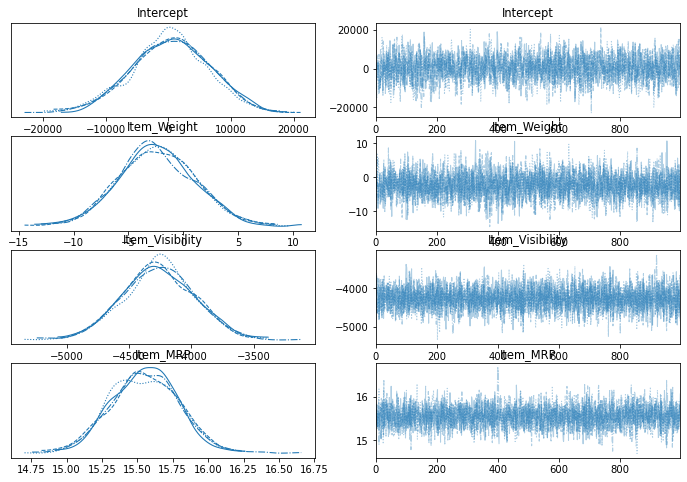

In [64]:
az.plot_trace(gaus_fit, var_names=["Intercept", "Item_Weight", "Item_Visibility","Item_MRP"])

In [65]:
gaus_fit.posterior.Item_MRP.values.mean()

15.5520391371264

In [66]:
gaus_fit.posterior.Item_Weight.values.mean()

-2.3799629975565924

In [67]:
gaus_fit.posterior.Item_Visibility.values.mean()

-4263.552853528708

<AxesSubplot:xlabel='Item_Outlet_Sales / Item_Outlet_Sales'>

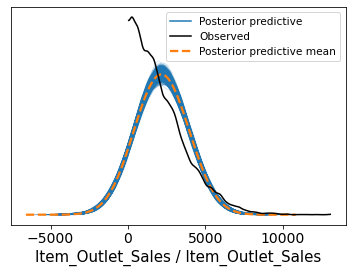

In [68]:
az.plot_ppc(gaus_fit)

***
**Bayesian w/PYMC3

In [38]:
import pymc3 as pm
import arviz as av
 
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'Probability Density')

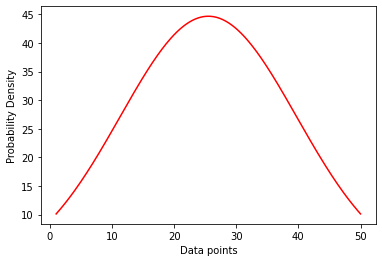

In [39]:
# Creating a series of data of in range of 1-50.
x = np.linspace(1,50,200)
 
#Creating a Function.
def normal_dist(x , mean , sd):
    prob_density = (np.pi*sd) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density
 
#Calculate mean and Standard deviation.
mean = np.mean(x)
sd = np.std(x)
 
#Apply function to the data.
pdf = normal_dist(x,mean,sd)
 
#Plotting the Results
plt.plot(x,pdf , color = 'red')
plt.xlabel('Data points')
plt.ylabel('Probability Density')

In [ ]:
with pm.Model() as model:
    # define priors
    a = pm.Normal('slope', 0, 16)
    b = pm.Normal('intercept', 0, 16)
    s = pm.Exponential('error', 1)
    
    # predictions
    obs = pm.Normal('observation', a*x + b, s, observed=y)
    
    # use MCMC to sample
    trace = pm.sample(return_inferencedata=True)
    
az.plot_posterior(trace)

***
***
***